In [ ]:
#converting to gray scale - enough to get only edges and shapes
#color doesn't matter - only outline is required.



## BINARY THRESHOLDING (ONLY BLACK/WHITE, NOT EVEN GRAY)

In [2]:
#thresholding is the method of segmenting images into differnet parts.

#threshold - image to have two values - white/black(binary threshold)


'''COLOR IMAGE----CONVERT TO GRAY SCALE------>GRAY IMAGE--------APPLY IMAGE THRESHOLD------->BINARY IMAGE'''

'COLOR IMAGE----CONVERT TO GRAY SCALE------>GRAY IMAGE--------APPLY IMAGE THRESHOLD------->BINARY IMAGE'

In [4]:
#now this binary image has all the required info with only 1 channel instead of 3 color channel.

#values: 0/1

In [5]:
import cv2
import matplotlib.pyplot as plt


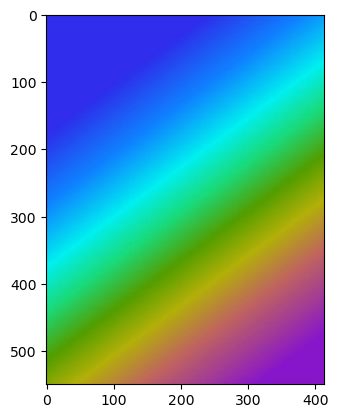

In [8]:
img_color = cv2.imread('Data/rainbow.jpg')

plt.imshow(img_color)
plt.show()

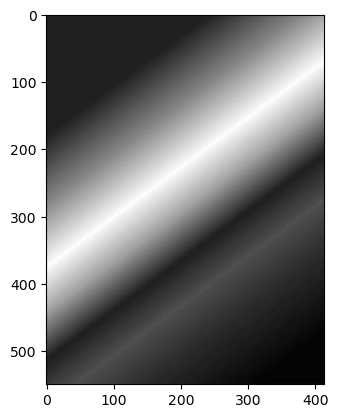

In [10]:
img = cv2.imread('Data/rainbow.jpg', 0) #to read as gray scale image

plt.imshow(img, cmap='gray')
plt.show()

In [11]:
img.shape

(550, 413)

In [14]:
img

array([[107, 107, 107, ..., 169, 170, 171],
       [103, 103, 103, ..., 169, 170, 171],
       [103, 103, 103, ..., 169, 170, 171],
       ...,
       [115, 115, 115, ...,  88,  89,  91],
       [116, 116, 116, ...,  89,  91,  93],
       [118, 118, 118, ...,  93,  94,  96]], dtype=uint8)

## THRESHOLD (BLACK/WHITE)

In [17]:
img.max() #max value in image

214

In [18]:
img.min()

87

In [19]:
ret, thresh1=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#img - source
#127 - threshold value (all value below threshold are made 0 (black) and above as 1 (white) -----better to choose half way point as threshold(255/2)-127
#255 - max value(1 - white)
#cv2.THRESH_BINARY-simple threshold model            

In [20]:
ret
#gives cutoff value

127.0

In [21]:
thresh1

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

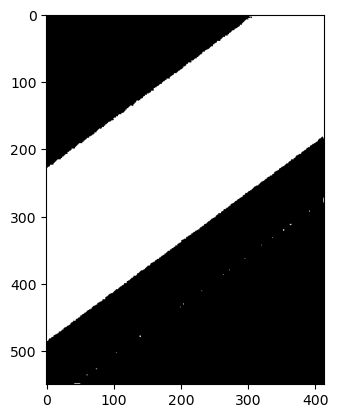

In [22]:
plt.imshow(thresh1, cmap='gray')
plt.show()

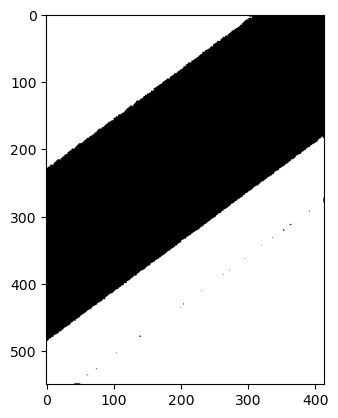

In [24]:
#can see  binary image


#trying diff threshold functions

#this gives inverse of binary:(white(0) and black (1)
ret2, thresh2=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh2, cmap='gray')
plt.show()

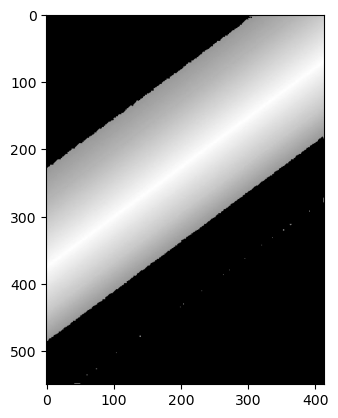

In [26]:

ret3, thresh3=cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh3, cmap='gray')
plt.show()

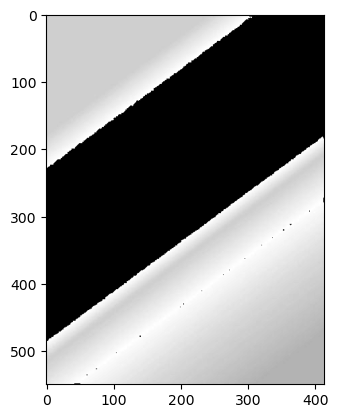

In [27]:

ret4, thresh4=cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

plt.imshow(thresh4, cmap='gray')
plt.show()

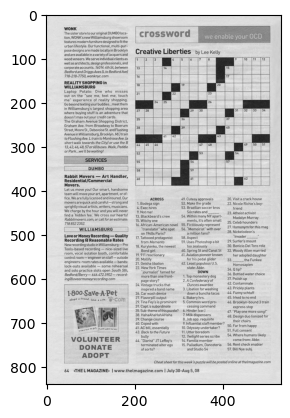

In [29]:
img_cw = cv2.imread('Data/crossword.jpg', 0)

plt.imshow(img_cw, cmap='gray')
plt.show()

In [30]:
#function to show image in a defined size:

def show_pic(img):
    fig=plt.figure(figsize=(15,15))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

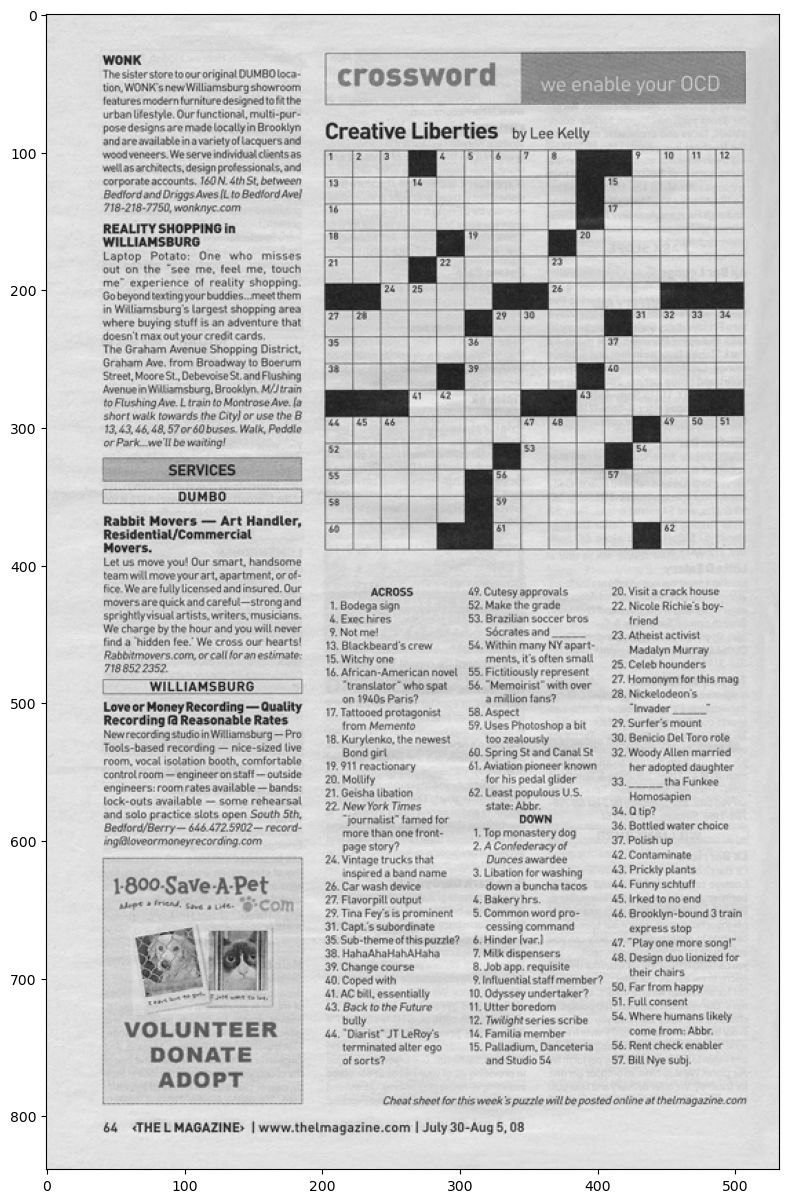

In [31]:
show_pic(img_cw)

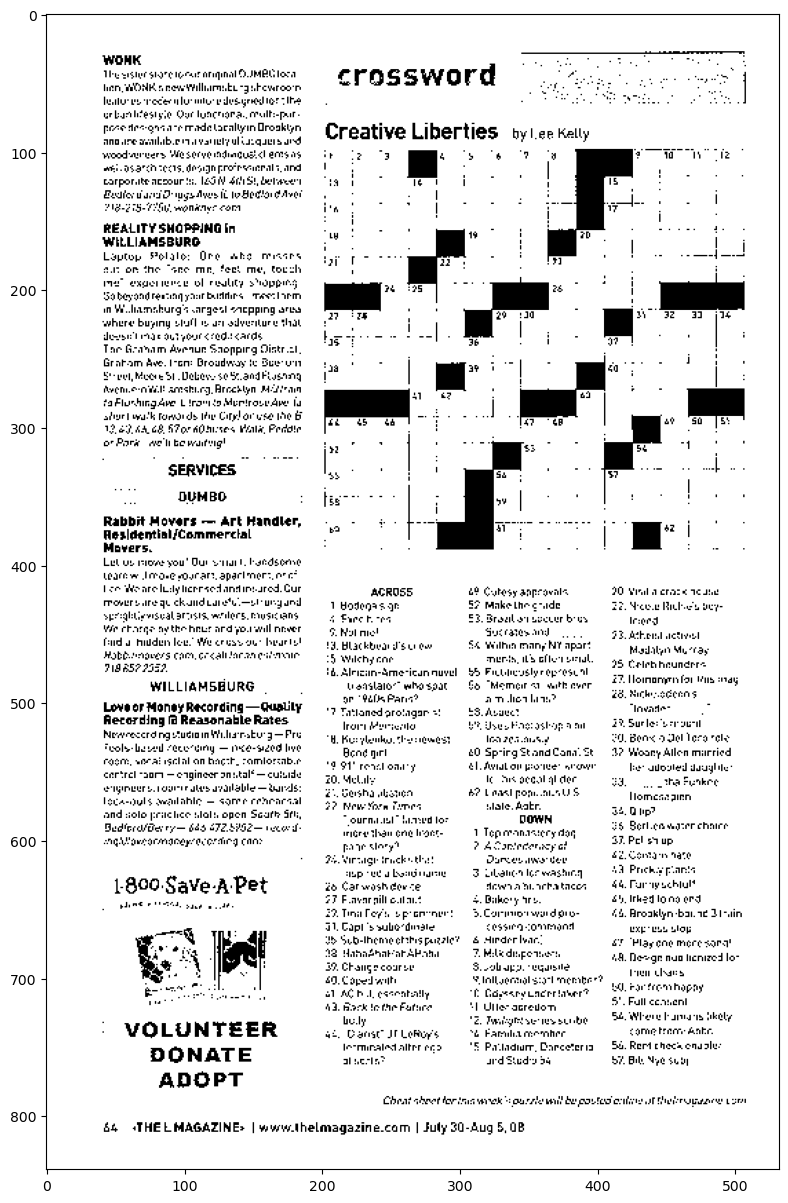

In [44]:
#thresholding

ret_cw, thresh_cw=cv2.threshold(img_cw, 127, 255, cv2.THRESH_BINARY)

show_pic(thresh_cw)

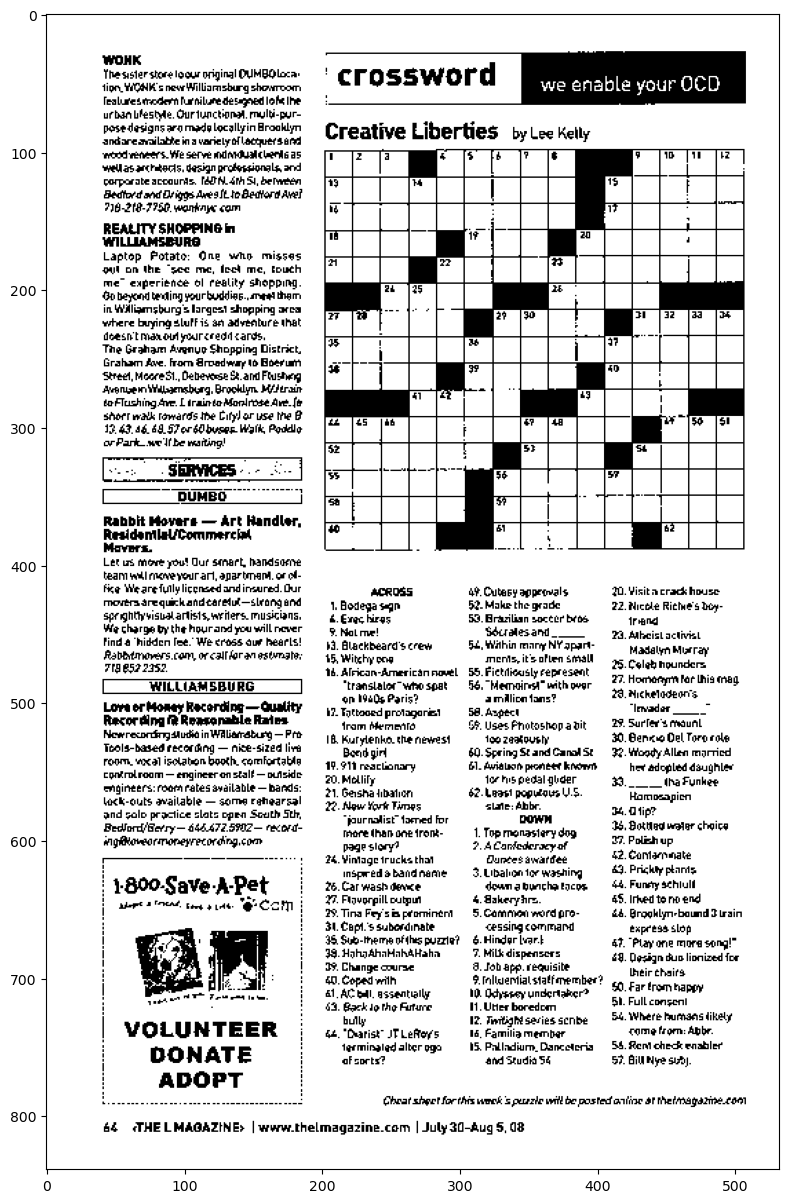

In [47]:
#using above threshold method & threshold value -loosing quality
#now experimenting with different threshold values and functions

ret_cw2, thresh_cw2=cv2.threshold(img_cw, 160, 255, cv2.THRESH_BINARY)

show_pic(thresh_cw2)

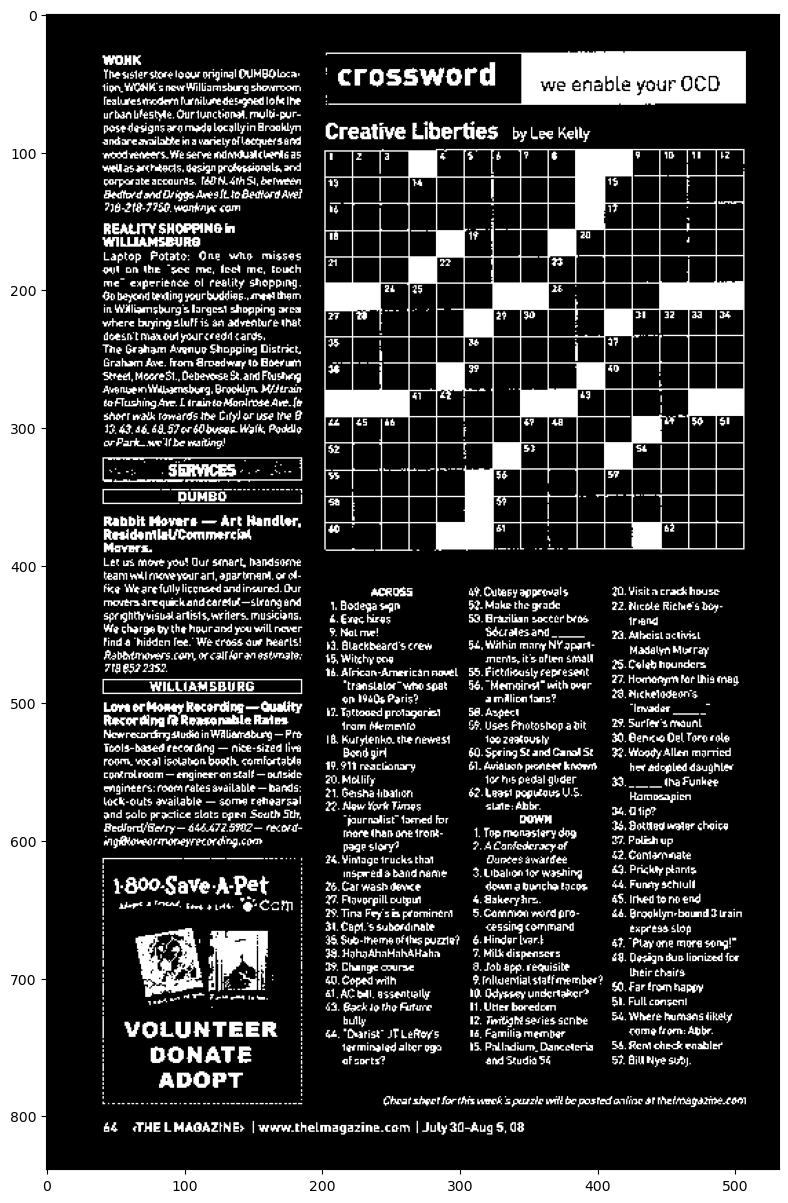

In [51]:
#better, but still no clarity even changing threshold value

#using diff threshold methods
ret_cw3, thresh_cw3=cv2.threshold(img_cw, 160, 255, cv2.THRESH_BINARY_INV)

show_pic(thresh_cw3)

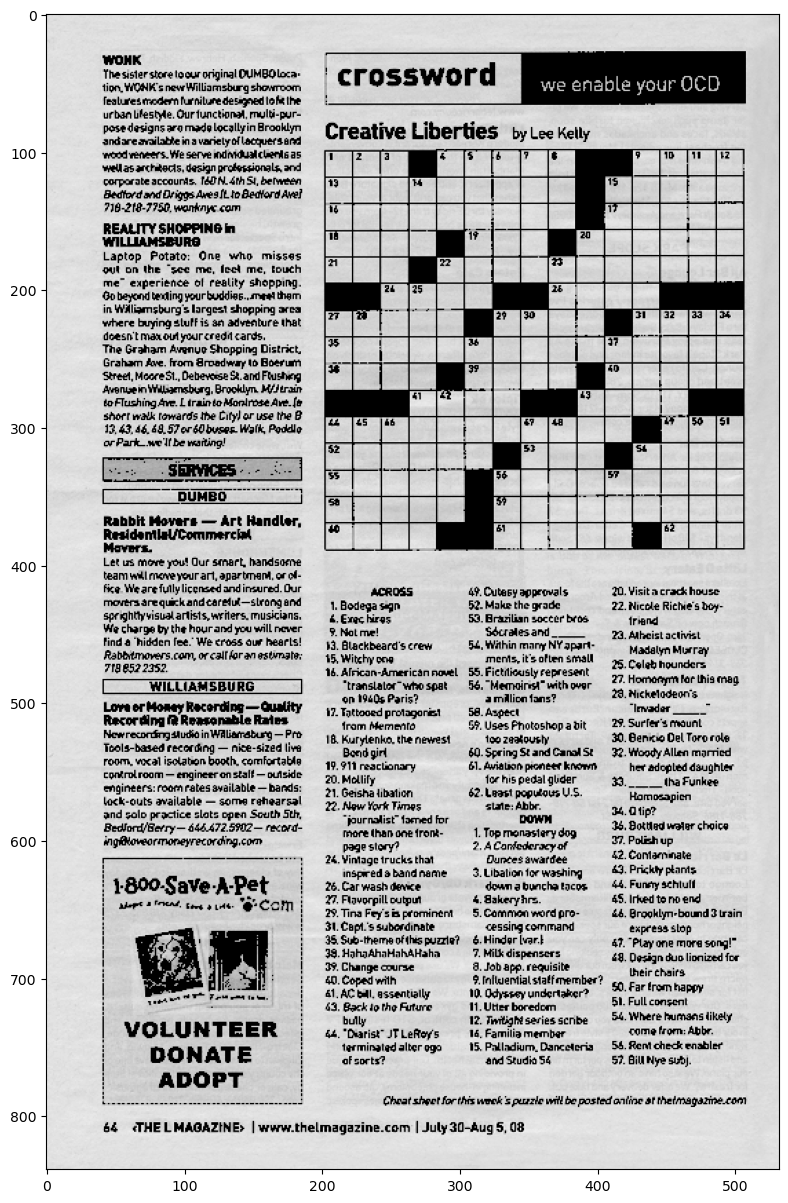

In [52]:
ret_cw4, thresh_cw4=cv2.threshold(img_cw, 160, 255, cv2.THRESH_TOZERO)

show_pic(thresh_cw4)

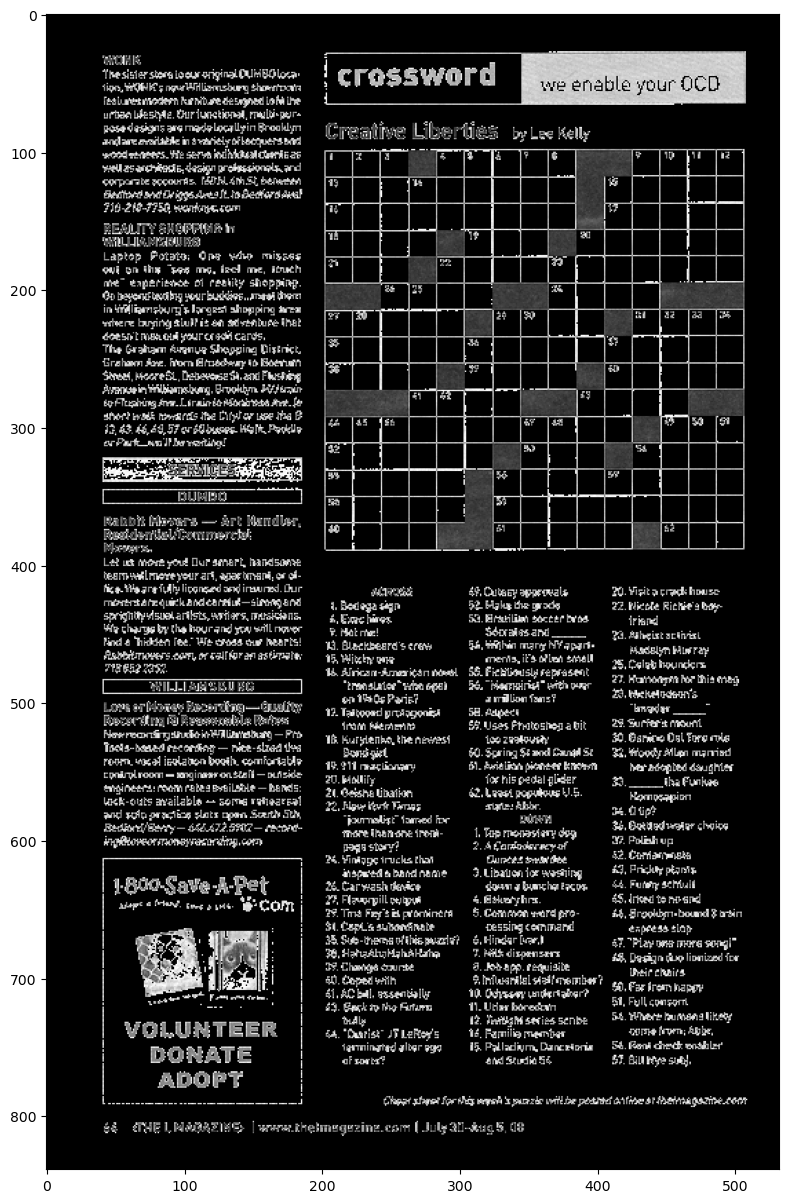

In [54]:
ret_cw5, thresh_cw5=cv2.threshold(img_cw, 170, 255, cv2.THRESH_TOZERO_INV)

show_pic(thresh_cw5)

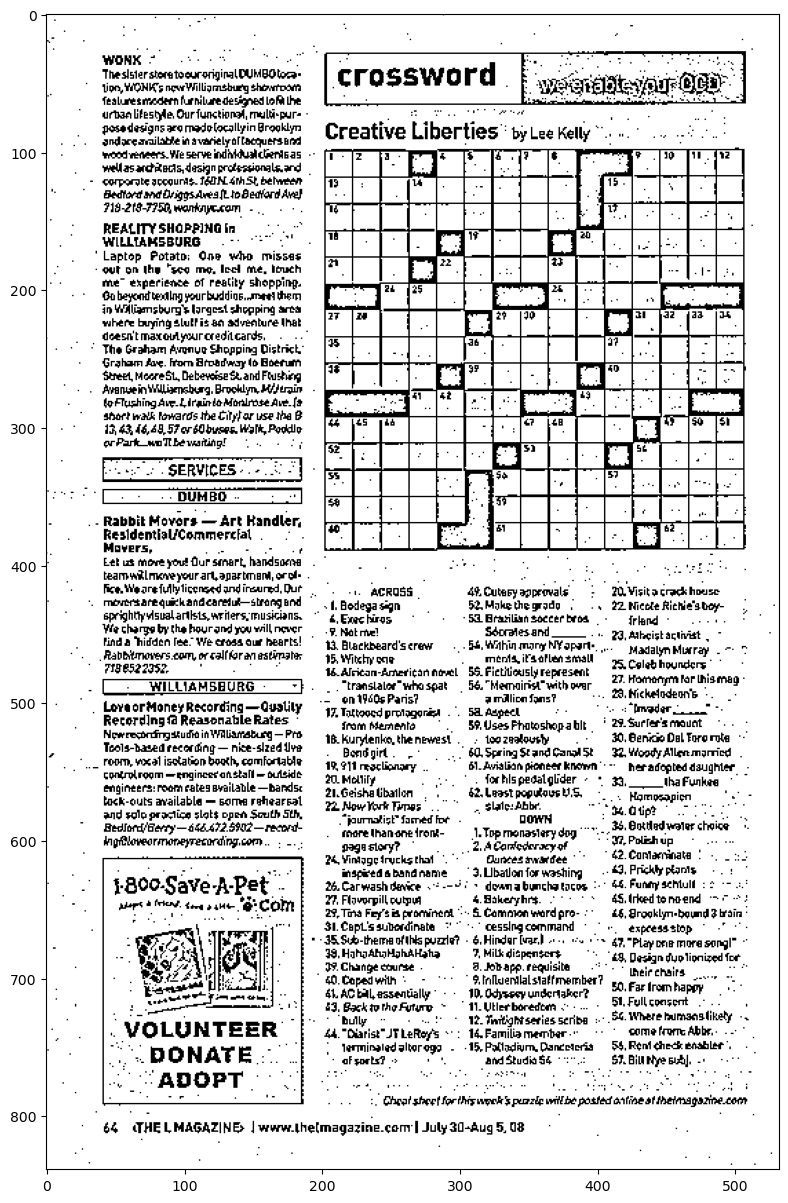

In [58]:
#instead of this giving adaptive threshold(automatically adapts threshold based on pixel and gray around pixel)

thresh_a = cv2.adaptiveThreshold(img_cw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)

'''src is image, adaptive methods are using gaussian/mean, block size is the size of pixel in neighbourhood used to calculate threshold, constant value to be subtracted from mean(+ve or -ve)'''


show_pic(thresh_a)

In [59]:
#this method looks at neighborhood around pixel and darker value pixel, it decides to include the pixel next to it or not.
#this recognized dark spaces not filled dark but recognized it.


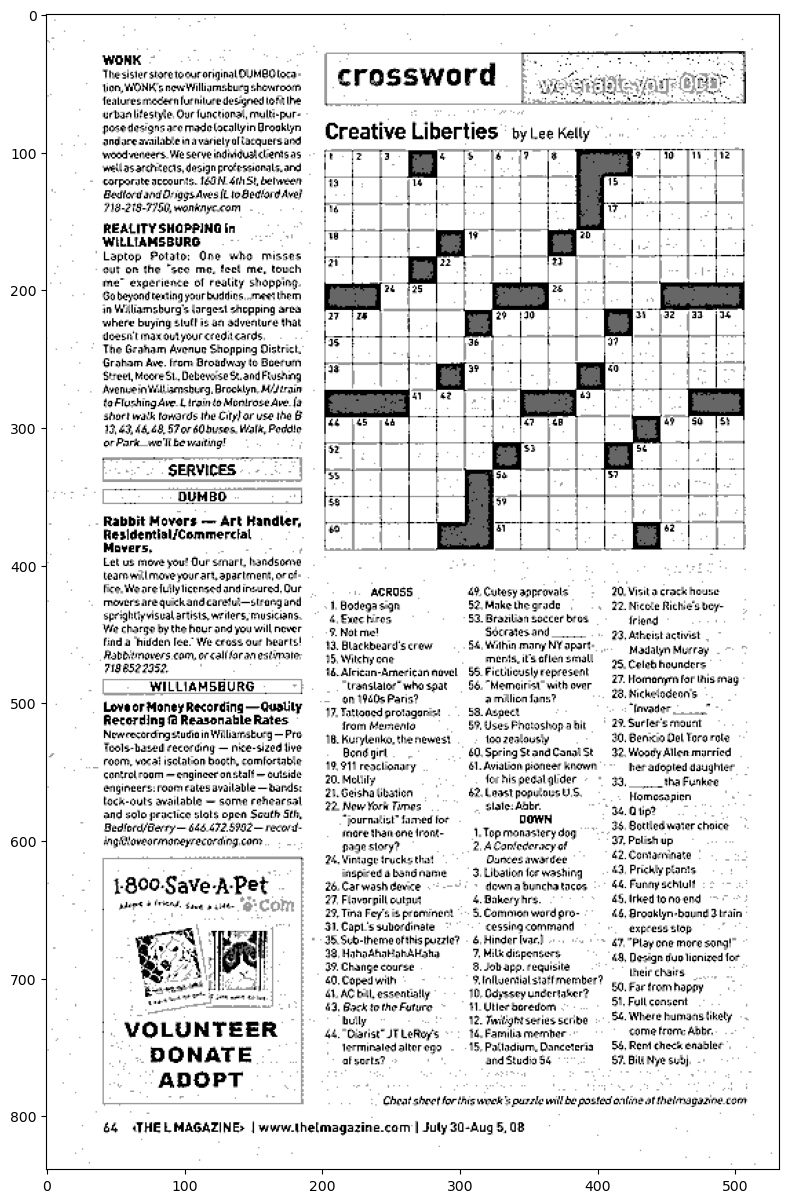

In [60]:
#To blend two threshold images - to see proper outlines:

#they are of same size - so can use addweighted instead of mask

blended_cw = cv2.addWeighted(src1=thresh_cw, alpha=0.6, src2=thresh_a, beta=0.4, gamma=0)
show_pic(blended_cw)